In [1]:
import icechunk
import xarray as xr

from ocr import catalog
from ocr.config import OCRConfig
from ocr.risks.fire import validate_data_coverage

In [2]:
config = OCRConfig(storage_root='/tmp/testing', debug=True)

In [3]:
scott = catalog.get_dataset('scott-et-al-2024-30m-4326').to_xarray()[['BP', 'CRPS', 'RPS']]
scott

<xarray.Dataset> Size: 245GB
Dimensions:    (latitude: 97579, longitude: 208881)
Coordinates:
  * latitude   (latitude) float64 781kB 22.43 22.43 22.43 ... 52.48 52.48 52.48
  * longitude  (longitude) float64 2MB -128.4 -128.4 -128.4 ... -64.05 -64.05
Data variables:
    BP         (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    CRPS       (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    RPS        (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
Attributes:
    title:        RDS-2020-0016-02
    version:      2024-V2
    data_source:  https://www.fs.usda.gov/rds/archive/catalog/RDS-2020-0016-2
    description:  Wildfire Risk to Communities: Spatial datasets of landscape...
    EPSG:         4326
    resolution:   30m

In [4]:
storage = icechunk.s3_storage(
    bucket='carbonplan-ocr', prefix='output/fire-risk/tensor/staging/ocr.icechunk/'
)
repo = icechunk.Repository.open(storage)
session = repo.readonly_session('main')
ds = xr.open_zarr(session.store)
ds

<xarray.Dataset> Size: 652GB
Dimensions:                     (latitude: 97579, longitude: 208881)
Coordinates:
  * latitude                    (latitude) float64 781kB 22.43 22.43 ... 52.48
  * longitude                   (longitude) float64 2MB -128.4 -128.4 ... -64.05
Data variables:
    USFS_RPS                    (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    wind_risk_2047              (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    burn_probability_2047       (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    burn_probability_usfs_2011  (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    conditional_risk_usfs       (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    burn_probability_usfs_2047  (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    wind_risk_2011              (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>
    burn_probability_2011       (latitude, longitude) float32 82GB dask.array<chunksize=(6000, 4500), meta=np.ndarray>

## Usage Example


y6_x6 slice(np.float64(33.515893851345204), np.float64(35.363857121965516), None) slice(np.float64(-120.0717215016403), np.float64(-118.68574904867506), None)


          Benchmark: Scott CRPS           
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric       ┃      Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total pixels │ 27,000,000 │     100.0% │
│ NaN pixels   │  8,590,360 │     31.82% │
│ Zero pixels  │  3,032,289 │     11.23% │
│ Valid pixels │ 15,377,351 │     56.95% │
└──────────────┴────────────┴────────────┘

╭───────────────────────────────────────────────────────────╮
│ → Using NaN-based domain (NaNs mark areas outside domain) │
╰───────────────────────────────────────────────────────────╯

     Data: wind_risk_2011      
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Metric       ┃        Value ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Shape        │ (6000, 4500) │
│ Total pixels │   27,000,000 │
│ NaN pixels   │    8,748,491 │
└──────────────┴──────────────┘

                  Validation Results (NaN-based domain)                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric                                      ┃      Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Scott valid domain pixels                   │ 18,409,640 │     68.18% │
│ Data NaN pixels within Scott's valid domain │    158,131 │    0.8590% │
└─────────────────────────────────────────────┴────────────┴────────────┘

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ ❌ FAIL: Data has 158,131 NaN pixels where Scott has valid data                                                 │
│ → These pixels should have valid values, not NaN                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

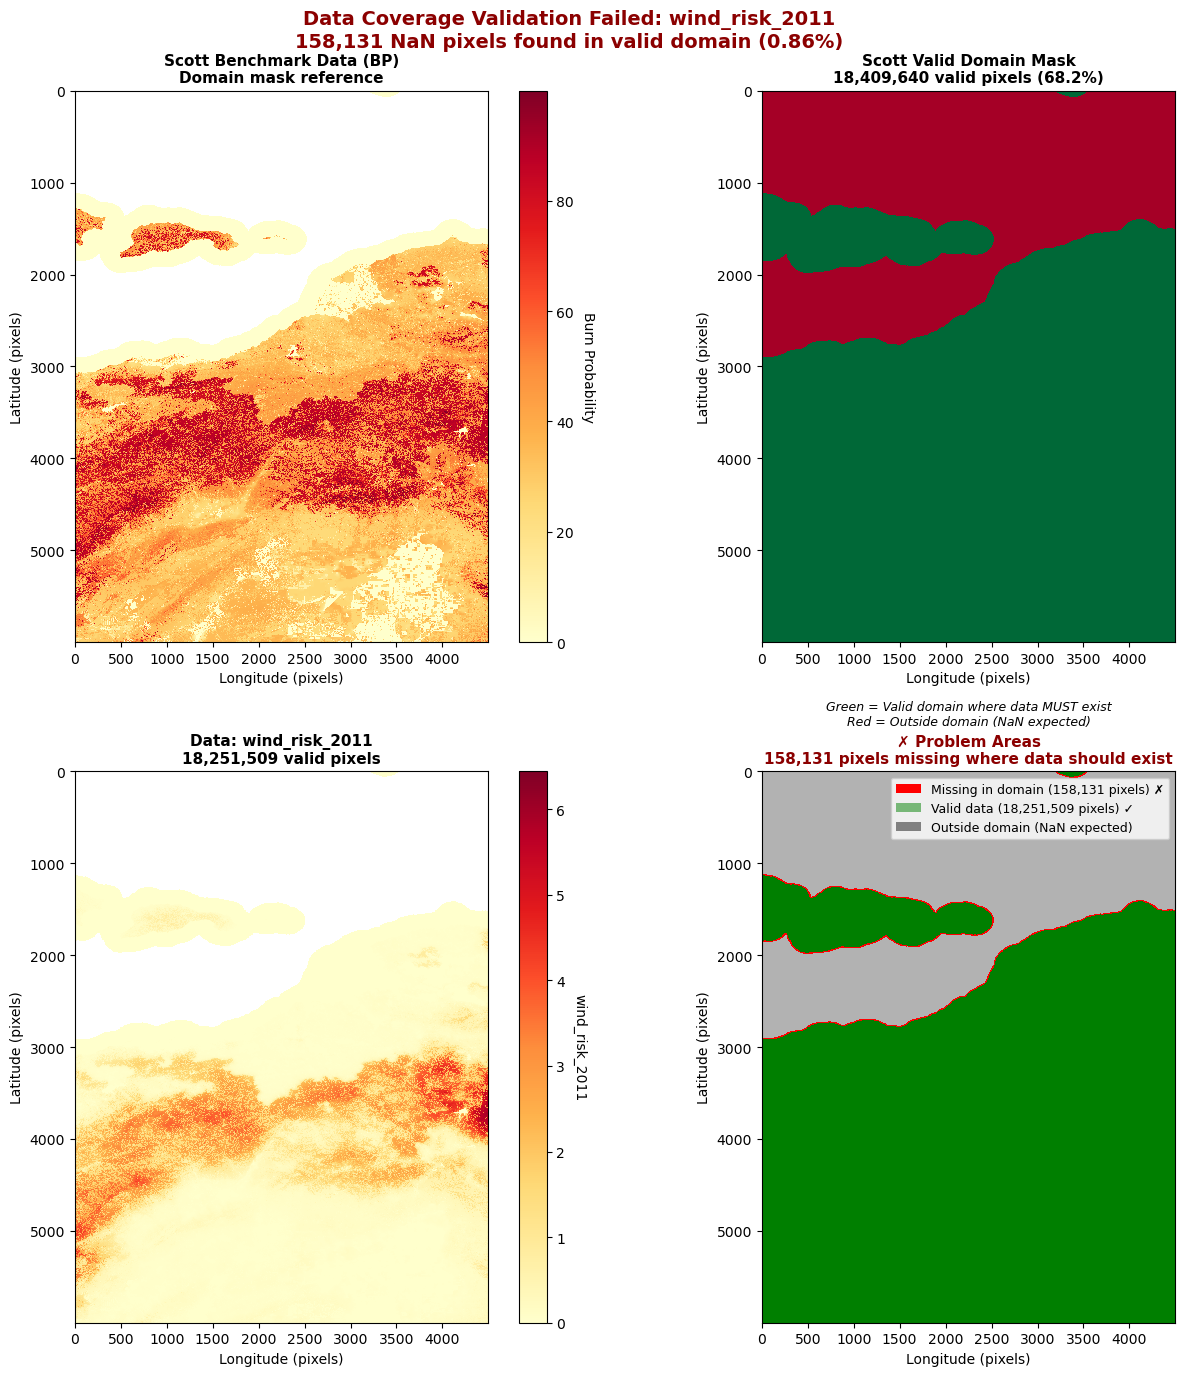

Sample coordinates where data is NaN but Scott
                   is valid                   
┏━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Index ┃ Latitude ┃ Longitude ┃ Scott Value ┃
┡━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 1     │  33.5160 │ -119.0934 │    0.000000 │
│ 2     │  33.5160 │ -119.0931 │    0.000000 │
│ 3     │  33.5160 │ -119.0928 │    0.000000 │
│ 4     │  33.5160 │ -119.0925 │    0.000000 │
│ 5     │  33.5160 │ -119.0921 │    0.000000 │
│ 6     │  33.5160 │ -119.0918 │    0.000000 │
│ 7     │  33.5160 │ -119.0915 │    0.000000 │
│ 8     │  33.5160 │ -119.0912 │    0.000000 │
│ 9     │  33.5160 │ -119.0909 │    0.000000 │
│ 10    │  33.5160 │ -119.0906 │    0.000000 │
└───────┴──────────┴───────────┴─────────────┘

y6_x8 slice(np.float64(33.515893851345204), np.float64(35.363857121965516), None) slice(np.float64(-117.29977659570983), np.float64(-115.9138041427446), None)


          Benchmark: Scott CRPS           
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric       ┃      Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total pixels │ 27,000,000 │     100.0% │
│ NaN pixels   │          0 │      0.00% │
│ Zero pixels  │  2,679,531 │      9.92% │
│ Valid pixels │ 24,320,469 │     90.08% │
└──────────────┴────────────┴────────────┘

╭───────────────────────────────────────────────────────────────────────────────╮
│ → Using zero-based domain (no NaNs in Scott; zeros mark areas outside domain) │
╰───────────────────────────────────────────────────────────────────────────────╯

     Data: wind_risk_2011      
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Metric       ┃        Value ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Shape        │ (6000, 4500) │
│ Total pixels │   27,000,000 │
│ NaN pixels   │            0 │
└──────────────┴──────────────┘

Validation Results (Zero-based 
            domain)            
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric              ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Data NaN pixels     │     0 │
│ Expected NaN pixels │     0 │
└─────────────────────┴───────┘

╭────────────────────────────────────────────────────────────╮
│ ✅ PASS: Data has zero NaN pixels (matching Scott pattern) │
╰────────────────────────────────────────────────────────────╯

y12_x5 slice(np.float64(44.603673475067076), np.float64(46.45163674568739), None) slice(np.float64(-121.45769395460553), np.float64(-120.0717215016403), None)


          Benchmark: Scott CRPS           
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric       ┃      Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total pixels │ 27,000,000 │     100.0% │
│ NaN pixels   │          0 │      0.00% │
│ Zero pixels  │    765,401 │      2.83% │
│ Valid pixels │ 26,234,599 │     97.17% │
└──────────────┴────────────┴────────────┘

╭───────────────────────────────────────────────────────────────────────────────╮
│ → Using zero-based domain (no NaNs in Scott; zeros mark areas outside domain) │
╰───────────────────────────────────────────────────────────────────────────────╯

     Data: wind_risk_2011      
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Metric       ┃        Value ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Shape        │ (6000, 4500) │
│ Total pixels │   27,000,000 │
│ NaN pixels   │            0 │
└──────────────┴──────────────┘

Validation Results (Zero-based 
            domain)            
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric              ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Data NaN pixels     │     0 │
│ Expected NaN pixels │     0 │
└─────────────────────┴───────┘

╭────────────────────────────────────────────────────────────╮
│ ✅ PASS: Data has zero NaN pixels (matching Scott pattern) │
╰────────────────────────────────────────────────────────────╯

y14_x3 slice(np.float64(48.2996000163077), np.float64(50.14756328692801), None) slice(np.float64(-124.229638860536), np.float64(-122.84366640757077), None)


          Benchmark: Scott CRPS           
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric       ┃      Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total pixels │ 27,000,000 │     100.0% │
│ NaN pixels   │ 24,535,811 │     90.87% │
│ Zero pixels  │  1,976,783 │      7.32% │
│ Valid pixels │    487,406 │      1.81% │
└──────────────┴────────────┴────────────┘

╭───────────────────────────────────────────────────────────╮
│ → Using NaN-based domain (NaNs mark areas outside domain) │
╰───────────────────────────────────────────────────────────╯

     Data: wind_risk_2011      
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Metric       ┃        Value ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Shape        │ (6000, 4500) │
│ Total pixels │   27,000,000 │
│ NaN pixels   │   24,651,727 │
└──────────────┴──────────────┘

                 Validation Results (NaN-based domain)                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric                                      ┃     Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Scott valid domain pixels                   │ 2,464,189 │      9.13% │
│ Data NaN pixels within Scott's valid domain │   115,916 │    4.7040% │
└─────────────────────────────────────────────┴───────────┴────────────┘

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ ❌ FAIL: Data has 115,916 NaN pixels where Scott has valid data                                                 │
│ → These pixels should have valid values, not NaN                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

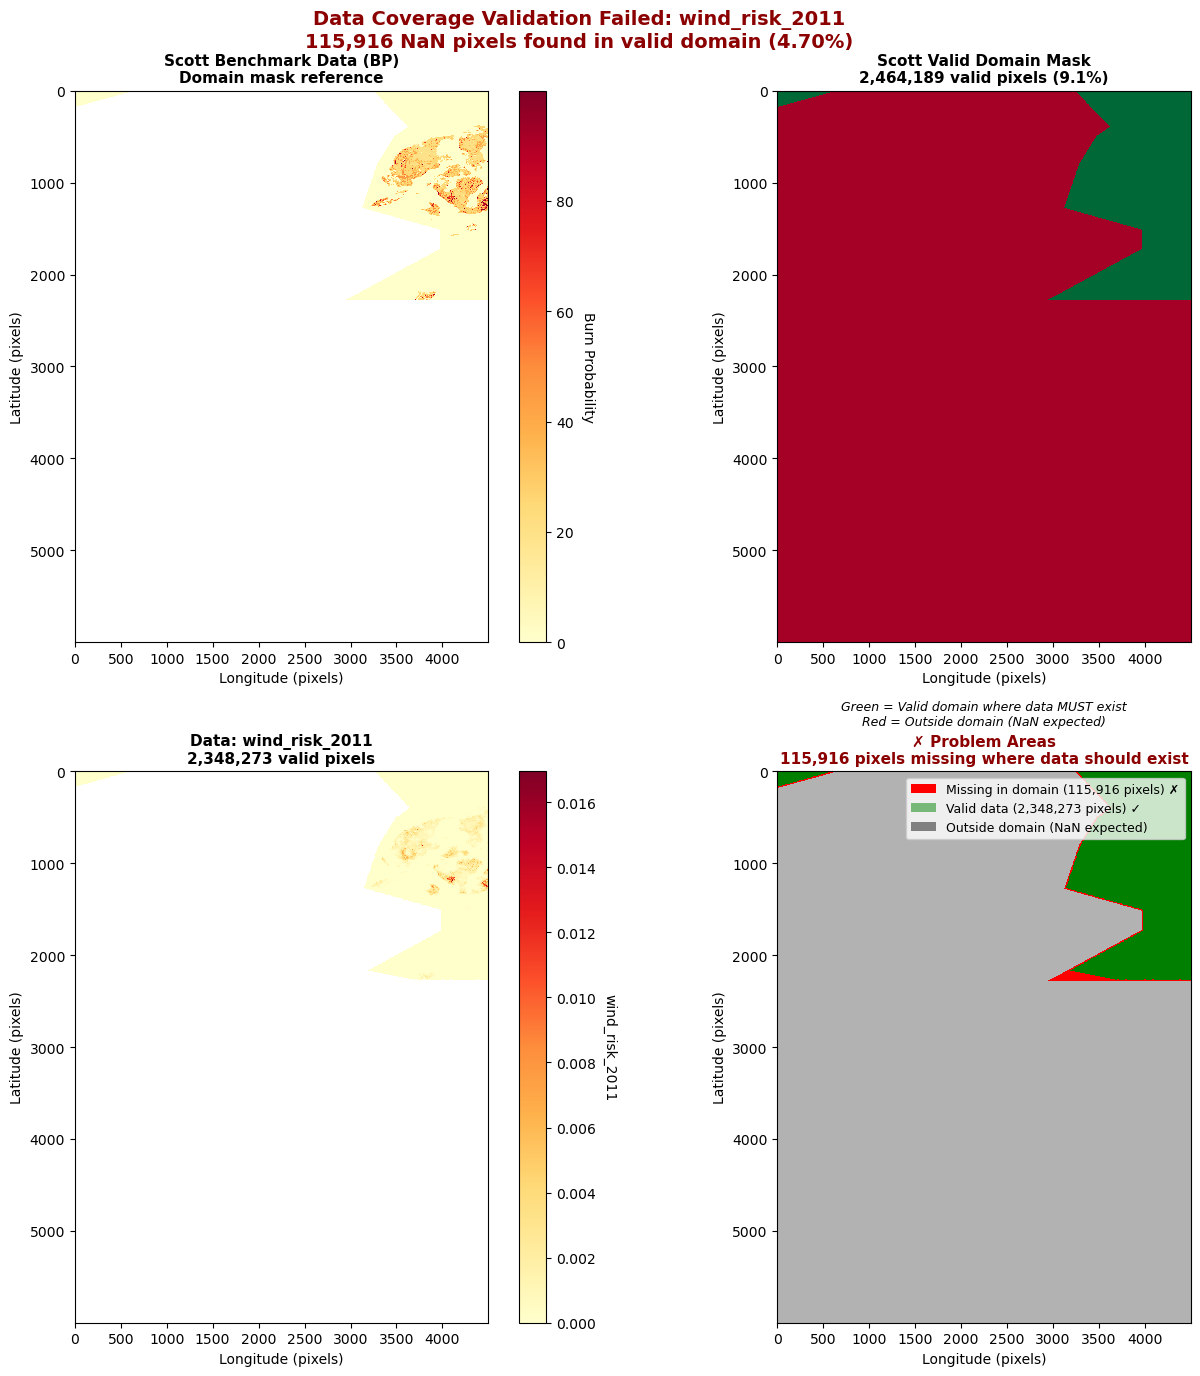

Sample coordinates where data is NaN but Scott
                   is valid                   
┏━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Index ┃ Latitude ┃ Longitude ┃ Scott Value ┃
┡━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 1     │  48.2998 │ -124.0391 │    0.000000 │
│ 2     │  48.2998 │ -124.0388 │    0.000000 │
│ 3     │  48.2998 │ -124.0385 │    0.000000 │
│ 4     │  48.2998 │ -124.0382 │    0.000000 │
│ 5     │  48.2998 │ -124.0379 │    0.000000 │
│ 6     │  48.2998 │ -124.0376 │    0.000000 │
│ 7     │  48.2998 │ -124.0373 │    0.000000 │
│ 8     │  48.2998 │ -124.0370 │    0.000000 │
│ 9     │  48.2998 │ -124.0367 │    0.000000 │
│ 10    │  48.2998 │ -124.0364 │    0.000000 │
└───────┴──────────┴───────────┴─────────────┘

y9_x17 slice(np.float64(39.05978366320614), np.float64(40.90774693382645), None) slice(np.float64(-104.82602451902272), np.float64(-103.44005206605749), None)


          Benchmark: Scott CRPS           
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric       ┃      Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total pixels │ 27,000,000 │     100.0% │
│ NaN pixels   │          0 │      0.00% │
│ Zero pixels  │  1,375,837 │      5.10% │
│ Valid pixels │ 25,624,163 │     94.90% │
└──────────────┴────────────┴────────────┘

╭───────────────────────────────────────────────────────────────────────────────╮
│ → Using zero-based domain (no NaNs in Scott; zeros mark areas outside domain) │
╰───────────────────────────────────────────────────────────────────────────────╯

     Data: wind_risk_2011      
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Metric       ┃        Value ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Shape        │ (6000, 4500) │
│ Total pixels │   27,000,000 │
│ NaN pixels   │            0 │
└──────────────┴──────────────┘

Validation Results (Zero-based 
            domain)            
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric              ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Data NaN pixels     │     0 │
│ Expected NaN pixels │     0 │
└─────────────────────┴───────┘

╭────────────────────────────────────────────────────────────╮
│ ✅ PASS: Data has zero NaN pixels (matching Scott pattern) │
╰────────────────────────────────────────────────────────────╯

In [5]:
for region_id in ['y6_x6', 'y6_x8', 'y12_x5', 'y14_x3', 'y9_x17']:
    y_slice, x_slice = config.chunking.region_id_to_latlon_slices(region_id=region_id)
    print(region_id, y_slice, x_slice)
    for var_name in ['wind_risk_2011']:
        result = validate_data_coverage(
            data_to_validate=ds[var_name].sel(latitude=y_slice, longitude=x_slice),
            scott=scott.sel(latitude=y_slice, longitude=x_slice).CRPS,
            visualize=True,  # Set to True to see plots
        )